## Membaca Dataset

In [83]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import os

In [84]:
df = pd.read_csv("dataset/WineQT.csv")
print("Dataset Loaded!")
df.head()

Dataset Loaded!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Tipe Data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [86]:
df["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

## Variabel Independen dan Dependen

In [87]:
x = df.iloc[:, :-2]
y = df.iloc[:, -2]

y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [88]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


## Split Data Testing & Training

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=0 , shuffle=False)
y_test

914     5
915     5
916     5
917     6
918     6
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 229, dtype: int64

In [90]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
914,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2
915,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2
916,7.6,0.740,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0
917,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
918,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [91]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
909,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
910,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9
911,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2
912,7.0,0.420,0.19,2.3,0.071,18.0,36.0,0.99476,3.39,0.56,10.9


In [92]:
y_train

0      5
1      5
2      5
3      6
4      5
      ..
909    6
910    6
911    6
912    5
913    5
Name: quality, Length: 914, dtype: int64

## Training Model

In [101]:
from sklearn import tree 

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train, y_train)

print("Training selesai!")

Training selesai!


## Evaluasi Akurasi & Confusion Matrix

Akurasi: 0.5982532751091703


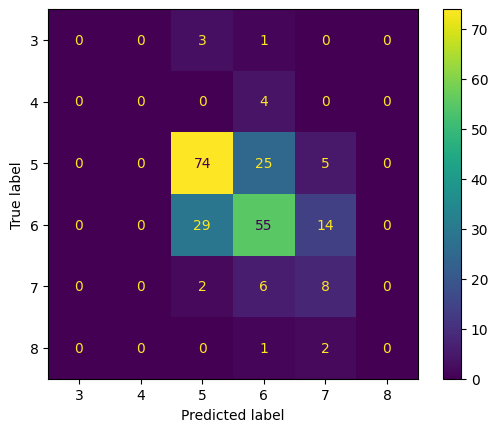

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay,  accuracy_score
y_pred = model.predict(x_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## Evaluasi Classification Report

In [95]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.69      0.71      0.70       104
           6       0.60      0.56      0.58        98
           7       0.28      0.50      0.36        16
           8       0.00      0.00      0.00         3

    accuracy                           0.60       229
   macro avg       0.26      0.30      0.27       229
weighted avg       0.59      0.60      0.59       229



c:\Users\Bagas\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Bagas\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Bagas\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

## Visualisasi Decision Tree

In [96]:
import matplotlib.pyplot as plt


fig =plt.figure(figsize=(150, 60))
tree.plot_tree(model, feature_names=x_train.columns, class_names=True, filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree")
plt.show()

## Simpan Gambar ke PDF

In [97]:
fig.savefig('decision_tree.pdf', format='pdf',bbox_inches='tight') 

## Simpan Model

In [98]:

with open('model/id3.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("model berhasil disimpan")

model berhasil disimpan


## Simpan Accuracy JSON

In [99]:
import json
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

metrics = {
    "accuracy": float(accuracy_score(y_test, y_pred)),
    "precision_macro": float(precision_score(y_test, y_pred, average="macro")),
    "recall_macro": float(recall_score(y_test, y_pred, average="macro")),
    "f1_macro": float(f1_score(y_test, y_pred, average="macro")),
    "f1_weighted": float(f1_score(y_test, y_pred, average="weighted"))
}

with open("ID3.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("accuracy.json created!")

accuracy.json created!


c:\Users\Bagas\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Testing Data Baru

In [100]:
new_data = [5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0]
predik = model.predict([new_data])
print (predik[0])

6


c:\Users\Bagas\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
